# Two tailed hypothesis test for population mean differences

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats

## Dummy data

In [58]:
start_date = "2023-04-01"
end_date = "2023-04-15"
idx = pd.date_range(start=start_date, end=end_date, freq="D")
data = np.random.randint(low=20, high=30, size=len(idx))
BEFORE = pd.Series(data=data, index=idx)

In [59]:
start_date = "2023-04-16"
end_date = "2023-04-30"
idx = pd.date_range(start=start_date, end=end_date, freq="D")
data = np.random.randint(low=20, high=30, size=len(idx))
AFTER = pd.Series(data=data, index=idx)

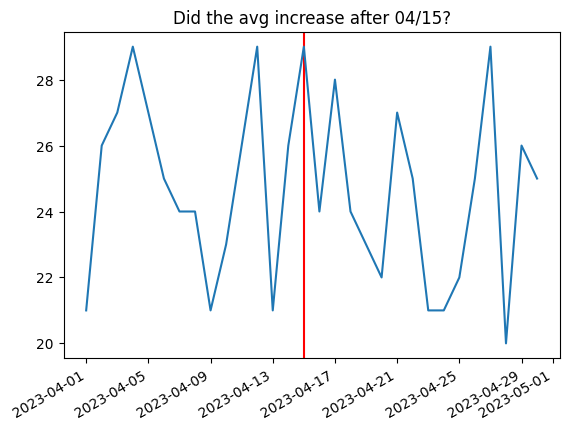

In [60]:
plt.axvline(x=datetime(2023, 4, 15), color='r')
pd.concat([BEFORE, AFTER]).plot(title="Did the avg increase after 04/15?")
plt.show()

## Pooled common variance

In [71]:
a = BEFORE.to_numpy()
b = AFTER.to_numpy()

n_a = len(a)
n_b = len(b)

# sample variance, ddof=1 applies unbiased estimator
var_a = np.var(a, ddof=1)
var_b = np.var(b, ddof=1)

pool_var = ((n_a - 1) * var_a + (n_b - 1) * var_b ) / (n_a + n_b - 2)

## Degrees of freedom

In [72]:
deg_free = n_a + n_b - 2

## T-statistic

In [73]:
# subtracting zero is to show our test, that there is no differnce between the means
t_stat = (np.mean(a) -np.mean(b) - 0) / np.sqrt((pool_var / n_a) + (pool_var / n_b))

## p-Value

The assumptions of the independent samples t-test are:

* The two samples are independent of each other.
* The populations from which the samples are drawn are normally distributed (or the sample size is large enough for the central limit theorem to apply).
* The variances of the populations from which the samples are drawn are equal (homoscedasticity).

If the assumption of equal variances is violated, a modified version of the t-test called the Welch's t-test can be used, which does not assume equal variances.

The `stats.ttest_ind()` function assumes that the two samples have equal variances by default. If you want to perform the Welch's t-test instead, you can set the equal_var parameter to `False`:

In [74]:
# multiply by 2 because it is a two tailed test
p_value = 2 * stats.t.sf(np.abs(t_stat), deg_free)

threshold = 0.05

outcome = "FAIL TO REJECT NULL" if p_value > threshold else "REJECT NULL"

print(f"""
p value: {p_value}
outcome: {outcome}
""")


p value: 0.29762712325654533
outcome: FAIL TO REJECT NULL



## One liner using scipy

In [70]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=1.0612896107865863, pvalue=0.29762712325654533)